## Objective and Problem Statement
- The main aim of this Notebook is to predict the price of cars using various Machine Learning (ML) models.
- Examining Underlying Data Insights which provides the buyers with required info to purchase the car based on major factors.
- from business point of view which variables are significant in predicting the price of a car and How well those variables describe the price of the car.

## Step 1 :-  Importing Necessary Libraries

In [332]:
# importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

In [333]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

##  Step 2 :- Loading The Dataset 

In [334]:
df=pd.read_csv("C:\\Users\\md kaif\\Downloads\\cars_engage_2022.csv")

In [335]:
df.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2

#### Deleting Unnecessary Index

In [336]:
del df["Unnamed: 0"]

In [337]:
df.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2 years /75000 K

### Checking Datatypes

In [338]:
df.dtypes

Make                                          object
Model                                         object
Variant                                       object
Ex-Showroom_Price                             object
Displacement                                  object
Cylinders                                    float64
Valves_Per_Cylinder                          float64
Drivetrain                                    object
Cylinder_Configuration                        object
Emission_Norm                                 object
Engine_Location                               object
Fuel_System                                   object
Fuel_Tank_Capacity                            object
Fuel_Type                                     object
Height                                        object
Length                                        object
Width                                         object
Body_Type                                     object
Doors                                        f

## Step 2 : Data Cleaning and Feature Engineering

### Checking For Information On Dataset

In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Cylinders                                  1276 non-null   float64
 1   Doors                                      1276 non-null   float64
 2   Seating_Capacity                           1276 non-null   float64
 3   Number_of_Airbags                          1276 non-null   float64
 4   Model                                      1276 non-null   float64
 5   Variant                                    1276 non-null   float64
 6   Price                                      1276 non-null   float64
 7   Displacement                               1276 non-null   float64
 8   Drivetrain                                 1276 non-null   int64  
 9   Emission_Norm                              1276 non-null   int64  
 10  Keyless_Entry           

### Checking For Null Values :-

In [339]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,"----------",df[i].isnull().sum()*100/df.shape[0])

Make ---------- 5.877742946708464
Displacement ---------- 0.9404388714733543
Cylinders ---------- 5.172413793103448
Valves_Per_Cylinder ---------- 7.993730407523511
Drivetrain ---------- 0.54858934169279
Cylinder_Configuration ---------- 1.0188087774294672
Emission_Norm ---------- 0.8620689655172413
Engine_Location ---------- 3.3699059561128526
Fuel_System ---------- 0.6269592476489029
Fuel_Tank_Capacity ---------- 5.407523510971787
Height ---------- 0.07836990595611286
Width ---------- 0.9404388714733543
Body_Type ---------- 0.4702194357366771
Doors ---------- 0.31347962382445144
City_Mileage ---------- 43.495297805642636
Highway_Mileage ---------- 62.69592476489028
ARAI_Certified_Mileage ---------- 8.934169278996865
ARAI_Certified_Mileage_for_CNG ---------- 97.88401253918495
Kerb_Weight ---------- 28.605015673981192
Gears ---------- 8.22884012539185
Ground_Clearance ---------- 22.648902821316614
Front_Brakes ---------- 1.9592476489028212
Rear_Brakes ---------- 1.9592476489028212
Fron

### Deleting The Columns Which Have More Than 70 Percentage Of Missing Values..

In [340]:
for i in df.columns:
    if df[i].isnull().sum()*100/df.shape[0]>70:
        df.drop(columns=[i],inplace=True)

#### Checking If Our Columns Got Deleted

In [341]:
df.shape

(1276, 115)

## Step 3 :-
## Segregate The Numeric And Object Data-types ,
## So That We Can Work On The Data More Effectively 

In [342]:
numeric=["int32","float64"]
df_numeric=df.select_dtypes(include=numeric)

### Filling missing values of df_numeric with median since median is robust to outliers.

In [343]:
for i in df_numeric:
    if df_numeric[i].isnull().sum()>0:
        df_numeric[i]=df_numeric[i].fillna(df_numeric[i].median())

In [344]:
df_numeric.isnull().sum()

Cylinders              0
Valves_Per_Cylinder    0
Doors                  0
Seating_Capacity       0
Number_of_Airbags      0
dtype: int64

#### Missing Values Have Been Filled In THe Numeric Columns

## Step 4:-  Moving Onto The Object Columns Of Our Data

In [345]:
df_object=df.select_dtypes(include="object")

In [346]:
df_object.isnull().sum()

Make                                          75
Model                                          0
Variant                                        0
Ex-Showroom_Price                              0
Displacement                                  12
Drivetrain                                     7
Cylinder_Configuration                        13
Emission_Norm                                 11
Engine_Location                               43
Fuel_System                                    8
Fuel_Tank_Capacity                            69
Fuel_Type                                      0
Height                                         1
Length                                         0
Width                                         12
Body_Type                                      6
City_Mileage                                 555
Highway_Mileage                              800
ARAI_Certified_Mileage                       114
Kerb_Weight                                  365
Gears               

###  Extracting important categorical features with respect to price in **df_obj_list**
- Since column count of object data type is 110 (large) so we will fetch those columns which are important with respect to car price with the help of domain knowledge.

In [347]:
df_obj_list = ['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Drivetrain', 'Emission_Norm','Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter','Fuel_Type', 'ARAI_Certified_Mileage','Front_Suspension', 'Rear_Suspension','Ground_Clearance','Boot_Space',
 'Audiosystem','Third_Row_AC_Vents', 'Ventilation_System','Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Gear_Indicator','ABS_(Anti-lock_Braking_System)','EBD_(Electronic_Brake-force_Distribution)',
 'Gear_Shift_Reminder','Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder','USB_Compatibility',
 'EBA_(Electronic_Brake_Assist)', 'Seat_Height_Adjustment','Navigation_System', 'Second_Row_AC_Vents', 'Rear_Center_Armrest','ESP_(Electronic_Stability_Program)','Cooled_Glove_Box', 'Turbocharger',
  'Rain_Sensing_Wipers','Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control']
len(df_obj_list)


45

In [348]:
df_obj=df_object.loc[:,df_obj_list]

In [349]:
df_obj

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),BS IV,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,CNG,NaN,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,RWD (Rear Wheel Drive),BS IV,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,21.9 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,94 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,Air Conditioning with cooling only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,FWD (Front Wheel Drive),BS IV,Smart Key,100PS@3600rpm,200Nm@1750rpm,Digital,Analog,Analog,2,Diesel,25.1 km/litre,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",165 mm,510 litres,DVD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,NaN,NaN,Yes,Yes,NaN,Rake,Front and rear sensors with camera,Yes,Yes,NaN,Manual Adjustment,Yes,Yes,Cup Holders,NaN,NaN,Yes,NaN,NaN,NaN,Yes
1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,FWD (Front Wheel Drive),BS IV,Smart Key,100PS@3600rpm,200Nm@1750rpm,Digital,Analog,Analog,2,Diesel,25.1 km/litre,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",165 mm,510 litres,DVD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,NaN,NaN,Yes,Yes,NaN,Rake,Rear sensors with camera,Yes,Yes,NaN,Manual Adjustment,Yes,Yes,

###  Checking the missing values percentage in df_object columns :- 

In [350]:
for i in df_obj.columns:
    print(i,"---------",(df_obj[i].isnull().sum()/df_obj.shape[0]))

Make --------- 0.05877742946708464
Model --------- 0.0
Variant --------- 0.0
Ex-Showroom_Price --------- 0.0
Displacement --------- 0.009404388714733543
Drivetrain --------- 0.0054858934169279
Emission_Norm --------- 0.008620689655172414
Keyless_Entry --------- 0.21473354231974923
Power --------- 0.0
Torque --------- 0.001567398119122257
Odometer --------- 0.03369905956112853
Speedometer --------- 0.03526645768025078
Tachometer --------- 0.01018808777429467
Tripmeter --------- 0.047021943573667714
Fuel_Type --------- 0.0
ARAI_Certified_Mileage --------- 0.08934169278996865
Front_Suspension --------- 0.04623824451410658
Rear_Suspension --------- 0.03605015673981191
Ground_Clearance --------- 0.22648902821316613
Boot_Space --------- 0.195141065830721
Audiosystem --------- 0.034482758620689655
Third_Row_AC_Vents --------- 0.28683385579937304
Ventilation_System --------- 0.0274294670846395
Auto-Dimming_Rear-View_Mirror --------- 0.48589341692789967
Hill_Assist --------- 0.6238244514106583


In [351]:
df_obj.isnull().sum().sum()

13568

### Checking Unique Values Of Columns :-

In [352]:
df_obj["Make"].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Land Rover Rover', 'Mitsubishi', 'Maruti Suzuki R'], dtype=object)

### Checking Unique Values In All Columns

In [353]:
for i in df_obj.columns:
    print(i,"------...------",df_obj[i].unique())

Make ------...------ ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' nan 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw' 'Land Rover'
 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley' 'Ferrari'
 'Aston Martin' 'Bugatti' 'Bajaj' 'Icml' 'Force' 'Mg' 'Kia'
 'Land Rover Rover' 'Mitsubishi' 'Maruti Suzuki R']
Model ------...------ ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper Works' 'Xe' '

#### So from above output we can see the ambiguity in make and model columns 

### Some Of THe Proposed Changes Are As Follows :-
### Changes In Make Columns:-
##### 1. Maruti Suzuki R - Maruti Suzuki
##### 2.- Land rover rover - land rover
### Changes In Model Columns:-
##### 1. Wagon - Wagon-R 
##### 2.Range - Range Rover


In [354]:
df_obj["Make"]=df_obj["Make"].replace("Maruti Suzuki R","Maruti Suzuki")
df_obj["Make"]=df_obj["Make"].replace("Land Rover Rover","Land Rover")

In [355]:
df_obj["Model"]=df_obj["Model"].replace("Range","Range Rover")
df_obj["Model"]=df_obj["Model"].replace("Wagon","Wagon R")

### Filling the missing values in make column


In [356]:
df_obj[df_obj["Make"].isnull()][["Make","Model"]]

,Make,Model
252,NaN,Mercedes-Benz B-Class
253,NaN,Mercedes-Benz B-Class
254,NaN,Mercedes-Benz B-Class
255,NaN,Mercedes-Benz B-Class
256,NaN,Mercedes-Benz Cla-Class
257,NaN,Mercedes-Benz Cla-Class
258,NaN,Mercedes-Benz Cla-Class
303,NaN,Mercedes-Benz E-Class Cabriolet
307,NaN,Mercedes-Benz Gls
308,NaN,Mercedes-Benz Gls



#### We use combine_first method to fill null values of Make with the corresponding entry of model then we replace mercedes , rolls-royce , go+ cars with their company name Mercedes, Rolls-Royce and Datsun respectively

- Note : combine_first() method is used to combine two series into one. The result is union of the two series that is in case of Null value in caller series, the value from passed series is taken. In case of both null values at the same index, null is returned at that index.

In [357]:
df_obj['Make']=df_obj['Make'].combine_first(df_obj['Model'])
df_obj['Make']

0             Tata
1             Tata
2             Tata
3             Tata
4             Tata
           ...    
1271         Honda
1272         Honda
1273         Honda
1274         Honda
1275    Mitsubishi
Name: Make, Length: 1276, dtype: object

In [358]:
df_obj['Make'].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', 'Mercedes-Benz B-Class',
       'Mercedes-Benz Cla-Class', 'Dc', 'Mini', 'Volvo', 'Jaguar', 'Bmw',
       'Land Rover', 'Mercedes-Benz E-Class Cabriolet', 'Porsche',
       'Mercedes-Benz Gls', 'Lexus', 'Mercedes-Benz S-Class', 'Maserati',
       'Mercedes-Benz G-Class', 'Mercedes-Benz Maybach',
       'Mercedes-Benz S-Class Cabriolet', 'Lamborghini', 'Bentley',
       'Ferrari', 'Aston Martin', 'Rolls-Royce Ghost Series Ii',
       'Rolls-Royce Wraith', 'Rolls-Royce Cullinan',
       'Rolls-Royce Phantom Coupe', 'Bugatti', 'Bajaj', 'Icml', 'Force',
       'Mg', 'Kia', 'Mercedes-Benz E-Class',
       'Mercedes-Benz C-Class Cabriolet', 'Mercedes-Benz V-Class',
       'Mercedes-Benz E-Class All Terrain', 'Mercedes-Benz Amg-Gt',
       'Mercedes-Benz Amg Gt 4-Door Coupe', 'Rolls-Royce Dawn',
      

### Check missing values again ..

In [359]:
df_obj['Make'].isnull().sum()

0

### Replacing mercedes , rolls-royce , go+  cars with their company name Mercedes, Rolls-Royce and Datsun respectively.

In [360]:
for i in df_obj['Make']:
    if 'Mercedes' in i:
        df_obj['Make']=df_obj['Make'].replace(i,'Mercedes-Benz')
    elif 'Rolls' in i:
         df_obj['Make']=df_obj['Make'].replace(i,'Rolls-Royce')
    elif "Go" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Datsun")

### Checking Unique Values Of Columns Again So As To Confirm Our Proposed Changes

In [361]:
df_obj["Make"].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', 'Mercedes-Benz', 'Dc',
       'Mini', 'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Rolls-Royce', 'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Mitsubishi'], dtype=object)

In [362]:
df_obj["Model"].unique()

array(['Nano Genx', 'Redi-Go', 'Kwid', 'Eeco', 'Alto K10', 'Go',
       'Celerio Tour', 'Santro', 'Tiago', 'Celerio X', 'Ignis', 'Triber',
       'Rio', 'Etios Liva', 'Micra Active', 'Bolt', 'Xcent Prime',
       'Dzire Tour', 'Elite I20', 'Aura', 'Polo', 'Dzire', 'Freestyle',
       'Ameo', 'Aspire', 'Platinum Etios', 'Etios Cross', 'Verito Vibe',
       'Urban Cross', 'Glanza', 'Avventura', 'Jazz', 'Compass Trailhawk',
       'Mu-X', 'Alturas G4', 'Tiguan', 'Cr-V', 'Superb Sportline', 'A3',
       'Mercedes-Benz B-Class', 'Mercedes-Benz Cla-Class', 'Kodiaq',
       'Avanti', 'Q3', 'Cooper 5 Door', 'Convertible', 'Xc40', 'Clubman',
       'A4', 'John Cooper Works', 'Xe', 'Xf', 'A3 Cabriolet', 'A6', 'X3',
       'Discovery Sport', 'S90', 'S5', 'X5', 'Mustang', 'Grand Cherokee',
       'Mercedes-Benz E-Class Cabriolet', 'M2 Competition', '718',
       'Mercedes-Benz Gls', 'Land Cruiser Prado', 'Rx 450H', 'Rs5',
       '7-Series', 'Q8', 'Mercedes-Benz S-Class', 'Levante',
       'Mercede

In [363]:
df_obj.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Drivetrain', 'Emission_Norm', 'Keyless_Entry', 'Power', 'Torque',
       'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter', 'Fuel_Type',
       'ARAI_Certified_Mileage', 'Front_Suspension', 'Rear_Suspension',
       'Ground_Clearance', 'Boot_Space', 'Audiosystem', 'Third_Row_AC_Vents',
       'Ventilation_System', 'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'Gear_Indicator', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Gear_Shift_Reminder',
       'Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents',
       'Rear_Center_Armrest', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'Rain_Sensing_Wipers',
       'Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Cont

#### Removing "Rs. " ,  "," in Ex-Showroom_price as below :

In [364]:
df_obj["Ex-Showroom_Price"]=df_obj["Ex-Showroom_Price"].str.replace("Rs. ","").str.replace(",","")

C:\Users\md kaif\AppData\Local\Temp\ipykernel_11644\3087651668.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_obj["Ex-Showroom_Price"]=df_obj["Ex-Showroom_Price"].str.replace("Rs. ","").str.replace(",","")


In [365]:
df_obj["Ex-Showroom_Price"].unique()

array(['292667', '236447', '296661', ..., '1431000', '1201000', '6862560'],
      dtype=object)

#### Renaming Ex-Showroom_Price column name to Price


In [366]:
df_obj.rename(columns={"Ex-Showroom_Price":"Price"},inplace=True)

#### Removing " cc" from displacement values :


In [367]:
df_obj["Displacement"]=df_obj["Displacement"].str.replace(" cc","")

### Checking mode values of all columns of df_obj dataframe

In [368]:
for i in df_obj.columns:
    print(i,"----",df_obj[i].mode()[0])

Make ---- Maruti Suzuki
Model ---- Nexon
Variant ---- Lxi
Price ---- 999900
Displacement ---- 1197
Drivetrain ---- FWD (Front Wheel Drive)
Emission_Norm ---- BS IV
Keyless_Entry ---- Smart Key
Power ---- 83PS@6000rpm
Torque ---- 200Nm@1750rpm
Odometer ---- Digital
Speedometer ---- Analog
Tachometer ---- Analog
Tripmeter ---- Yes
Fuel_Type ---- Petrol
ARAI_Certified_Mileage ---- 23 km/litre
Front_Suspension ---- MacPherson Strut
Rear_Suspension ---- Torsion Beam
Ground_Clearance ---- 165 mm
Boot_Space ---- 350 litres
Audiosystem ---- CD Player with USB & Aux-in
Third_Row_AC_Vents ---- Not Applicable
Ventilation_System ---- Fully automatic climate control
Auto-Dimming_Rear-View_Mirror ---- Yes
Hill_Assist ---- Yes
Gear_Indicator ---- Yes
ABS_(Anti-lock_Braking_System) ---- Yes
EBD_(Electronic_Brake-force_Distribution) ---- Yes
Gear_Shift_Reminder ---- Yes
Adjustable_Steering_Column ---- Rake, Reach
Parking_Assistance ---- Rear sensors with camera
Key_Off_Reminder ---- Yes
USB_Compatibili

### Replacing those features having yes or no values with its mode value.

In [369]:
for i in df_obj.columns:
    if df_obj[i].isna().sum()>0:
        if "Yes" in df_obj[i].unique():
            df_obj[i].fillna("not_defined",inplace = True)
        else:
            df_obj[i].fillna(df_obj[i].mode()[0],inplace=True)

### Checking If Null Values Persists..

In [370]:
df_obj.isnull().sum().sum()

0

In [371]:
df_obj.isnull().sum().sum()

0

### We Need To Clean the following columns in order to use them appropriately for machine learning
- Power
- ARAI_Certified_Mileage
- Ground_Clearance
- Bootspace
- Torque

### 1. Power

####  fetching first four characters from power.

In [372]:
df_obj["Power"]=df_obj["Power"].apply(lambda x:x[0:4])
df_obj["Power"].unique()

array(['38PS', '54PS', '68PS', '73PS', '74PS', '62PS', '59PS', '78PS',
       '59bh', '69PS', '86PS', '83PS', '72PS', '76.6', '64PS', '80PS',
       '75PS', '90PS', '81.8', '70bh', '71PS', '69bh', '84PS', '100P',
       '76PS', '105P', '110P', '84.3', '96PS', '65PS', '93PS', '140p',
       '89PS', '82PS', '89 b', '173P', '177P', '178b', '178B', '141P',
       '154P', '120P', '180P', '143P', '150P', '122P', '136P', '183P',
       '148b', '250P', '148h', '116P', '192P', '190b', '190P', '231h',
       '247P', '180p', '148 ', '245P', '248 ', '179P', '333P', '265H',
       '340H', '401P', '240P', '468 ', '286P', '334P', '410h', '300P',
       '258P', '557P', '262P', '450P', '265P', '340P', '609P', '275P',
       '350P', '430P', '585h', '289P', '460P', '299P', '630P', '453P',
       '550P', '261P', '455P', '610P', '650P', '590P', '560P', '608P',
       '605P', '563P', '570 ', '625P', '512P', '563@', '1479', '1600',
       '13bh', '12bh', '48PS', '47hp', '67PS', '77PS', '101.', '82hp',
      

### Creating a  Loop Which Removes Non- Numeric Characters From The Power Columns

In [373]:
l1=[]
for i in df_obj["Power"]:
    s1=""
    for j in i:
        if j=="u" and "n" and "d" and "e" and "f" and "i" and "n" and "e" and "d":
            s1="undefined"
        elif j.isdigit() or j==".":
            s1=s1+j
    l1.append(s1)

In [374]:
df_obj["Power"]=l1

#### Checking Unique Values To See Our Proposed Changes

In [375]:
df_obj["Power"].unique()

array(['38', '54', '68', '73', '74', '62', '59', '78', '69', '86', '83',
       '72', '76.6', '64', '80', '75', '90', '81.8', '70', '71', '84',
       '100', '76', '105', '110', '84.3', '96', '65', '93', '140', '89',
       '82', '173', '177', '178', '141', '154', '120', '180', '143',
       '150', '122', '136', '183', '148', '250', '116', '192', '190',
       '231', '247', '245', '248', '179', '333', '265', '340', '401',
       '240', '468', '286', '334', '410', '300', '258', '557', '262',
       '450', '609', '275', '350', '430', '585', '289', '460', '299',
       '630', '453', '550', '261', '455', '610', '650', '590', '560',
       '608', '605', '563', '570', '625', '512', '1479', '1600', '13',
       '12', '48', '47', '67', '77', '101.', '117', '118', '114', '63',
       '63.9', '123', '106', '85', '128', '109', '115', '25.8', '41.5',
       '119', '104', '121', '155', '41', '156', '166', '164', '174',
       '162', '163', '88.4', '142.', '200', '160', '187', '372', '181',
       '

### 2. ARAI_Certified_Mileage

In [376]:
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6 km/litre', '23 km/litre', '21.9 km/litre', '25.17 km/litre',
       '22.5 km/litre', '23.01 km/litre', '24.04 km/litre', '15 km/litre',
       '24.07 km/litre', '20.1 km/litre', '23.1 km/litre',
       '20.3 km/litre', '24 km/litre', '20.89 km/litre', '20.5 km/litre',
       '16 km/litre', '23.7 km/litre', '18.16 km/litre', '23.59 km/litre',
       '18.97 km/litre', '19.49 km/litre', '22.95 km/litre',
       '17.57 km/litre', '15.7 km/litre', '20.14 km/litre', '20 km/litre',
       '28.4 km/litre', '22 km/litre', '18.6 km/litre', '22.54 km/litre',
       '18.15 km/litre', '25.35 km/litre', '20.4 km/litre',
       '25.4 km/litre', '18.78 km/litre', '17.21 km/litre',
       '19.91 km/litre', '24.4 km/litre', '19 km/litre', '21.66 km/litre',
       '21.73 km/litre', '26.1 km/litre', '19.4 km/litre',
       '16.78 km/litre', '17.71 km/litre', '20.08 km/litre',
       '17.1 km/litre', '23.87 km/litre', '21.01 km/litre',
       '19.56 km/litre', '18.2 km/litre', '27.3 km/litre',

#### Again Fetching First Four Characters 

In [377]:
df_obj["ARAI_Certified_Mileage"]=df_obj["ARAI_Certified_Mileage"].apply(lambda x:x[0:4])

In [378]:
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6', '23 k', '21.9', '25.1', '22.5', '23.0', '24.0', '15 k',
       '20.1', '23.1', '20.3', '24 k', '20.8', '20.5', '16 k', '23.7',
       '18.1', '23.5', '18.9', '19.4', '22.9', '17.5', '15.7', '20 k',
       '28.4', '22 k', '18.6', '25.3', '20.4', '25.4', '18.7', '17.2',
       '19.9', '24.4', '19 k', '21.6', '21.7', '26.1', '16.7', '17.7',
       '20.0', '17.1', '23.8', '21.0', '19.5', '18.2', '27.3', '16.3',
       '13.8', '12.3', '12.0', '17.0', '14.4', '18.3', '13.7', '19.2',
       '14.8', '15.0', '17.9', '10 k', '16.9', '21.1', '14.5', '16.4',
       '11 k', '13.1', '19.3', '14.1', '18.5', '13.5', '13.3', '11.2',
       '13 k', '12.8', '8.61', '9.8-', '7.4 ', '11.6', '12 k', '11.1',
       '18 k', '10.8', '17.6', '11.8', '7.96', '7.8 ', '14 k', '7.9 ',
       '10.6', '6.71', '8.6 ', '9 km', '8.77', '17.3', '7.29', '10.2',
       '9.5 ', '22.4', '22.8', '5.95', '35 k', '22.0', '21.4', '19.7',
       '25.2', '25 k', '20.6', '27.4', '11.9', '23.9', '16.5', '15.9',
      

#### Splitting the column on the basis of " " and then removing "kmpl".

In [379]:
df_obj["ARAI_Certified_Mileage"]= df_obj["ARAI_Certified_Mileage"].str.split(' ', expand=True)[0]

In [380]:
df_obj["ARAI_Certified_Mileage"]=df_obj["ARAI_Certified_Mileage"].str.replace("kmpl","")

In [381]:
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6', '23', '21.9', '25.1', '22.5', '23.0', '24.0', '15', '20.1',
       '23.1', '20.3', '24', '20.8', '20.5', '16', '23.7', '18.1', '23.5',
       '18.9', '19.4', '22.9', '17.5', '15.7', '20', '28.4', '22', '18.6',
       '25.3', '20.4', '25.4', '18.7', '17.2', '19.9', '24.4', '19',
       '21.6', '21.7', '26.1', '16.7', '17.7', '20.0', '17.1', '23.8',
       '21.0', '19.5', '18.2', '27.3', '16.3', '13.8', '12.3', '12.0',
       '17.0', '14.4', '18.3', '13.7', '19.2', '14.8', '15.0', '17.9',
       '10', '16.9', '21.1', '14.5', '16.4', '11', '13.1', '19.3', '14.1',
       '18.5', '13.5', '13.3', '11.2', '13', '12.8', '8.61', '9.8-',
       '7.4', '11.6', '12', '11.1', '18', '10.8', '17.6', '11.8', '7.96',
       '7.8', '14', '7.9', '10.6', '6.71', '8.6', '9', '8.77', '17.3',
       '7.29', '10.2', '9.5', '22.4', '22.8', '5.95', '35', '22.0',
       '21.4', '19.7', '25.2', '25', '20.6', '27.4', '11.9', '23.9',
       '16.5', '15.9', '24.3', '17', '19.6', '19.1', '16.0', '21.5'

### Mileage Cannot Be In 1000s So It Is An Anomaly

In [382]:
df_obj[df_obj["ARAI_Certified_Mileage"]=="1449"]

,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1036,Mercedes-Benz,Mercedes-Benz C-Class,C 43 Amg,7500000,3982,RWD (Rear Wheel Drive),BS 6,Smart Key,503,700Nm@1750RPM,Digital,Analog,Analog,Yes,Petrol,1449,AGILITY CONTROL suspension with selective damp...,AGILITY CONTROL suspension with selective damp...,112 mm,435 litres,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [383]:
df_obj.loc[1036,"ARAI_Certified_Mileage"]=14.49

In [384]:
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6', '23', '21.9', '25.1', '22.5', '23.0', '24.0', '15', '20.1',
       '23.1', '20.3', '24', '20.8', '20.5', '16', '23.7', '18.1', '23.5',
       '18.9', '19.4', '22.9', '17.5', '15.7', '20', '28.4', '22', '18.6',
       '25.3', '20.4', '25.4', '18.7', '17.2', '19.9', '24.4', '19',
       '21.6', '21.7', '26.1', '16.7', '17.7', '20.0', '17.1', '23.8',
       '21.0', '19.5', '18.2', '27.3', '16.3', '13.8', '12.3', '12.0',
       '17.0', '14.4', '18.3', '13.7', '19.2', '14.8', '15.0', '17.9',
       '10', '16.9', '21.1', '14.5', '16.4', '11', '13.1', '19.3', '14.1',
       '18.5', '13.5', '13.3', '11.2', '13', '12.8', '8.61', '9.8-',
       '7.4', '11.6', '12', '11.1', '18', '10.8', '17.6', '11.8', '7.96',
       '7.8', '14', '7.9', '10.6', '6.71', '8.6', '9', '8.77', '17.3',
       '7.29', '10.2', '9.5', '22.4', '22.8', '5.95', '35', '22.0',
       '21.4', '19.7', '25.2', '25', '20.6', '27.4', '11.9', '23.9',
       '16.5', '15.9', '24.3', '17', '19.6', '19.1', '16.0', '21.5'

In [385]:
df_obj["ARAI_Certified_Mileage"]=df_obj["ARAI_Certified_Mileage"].str.replace("km","").str.replace("9.8-","9.9")

C:\Users\md kaif\AppData\Local\Temp\ipykernel_11644\2646328865.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_obj["ARAI_Certified_Mileage"]=df_obj["ARAI_Certified_Mileage"].str.replace("km","").str.replace("9.8-","9.9")


In [386]:
#df_obj["ARAI_Certified_Mileage"].unique()

### 3.Torque

#### Doing Some  Changes So As To MAke It Completely Numeric

In [387]:
df_obj["Torque"]=df_obj["Torque"].str.split('@', expand=True)[0]

In [388]:
l2=[]
for i in df_obj["Torque"]:
    s=""
    for j in i:
        #print(j)
        if j=="u" and "n" and "d" and "e" and "f" and "i" and "n" and "e" and "d":
            #print(j)
            s="undefined"
        elif j.isdigit() or j==".":
            s=s+j
    #print(s)
    l2.append(s)
df_obj["Torque"]=l2

In [389]:
#df_obj["Torque"].unique()

### 4.Ground Clearance

In [390]:
df_obj["Ground_Clearance"].unique()

array(['180 mm', '185 mm', '184 mm', '160 mm', '165 mm', '170 mm',
       '182 mm', '200 mm', '154 mm', '163 mm', '190 mm', '174 mm',
       '172 mm', '205 mm', '220 mm', '149 mm', '198 mm', '208 mm',
       '164 mm', '161 mm', '211 mm', '146 mm', '125 mm', '100 mm',
       '212 mm', '167 mm', '152 mm', '137 mm', '206 mm', '210 mm',
       '307 mm', '140 mm', '109 mm', '241 mm', '215 mm', '110 mm',
       '142 mm', '119 mm', '130 mm', '113 mm', '150 mm', '175 mm',
       '209 mm', '195 mm', '133 mm', '225 mm', '188 mm', '179 mm',
       '136 mm', '157 mm', '201 mm', '155 mm', '498 mm', '218 mm',
       '238 mm', '295.5 mm', '227 mm', '295 mm', '128 mm', '135 mm',
       '186 mm', '192 mm', '132 mm', '112 mm', '213 mm', '121 mm',
       '122 mm', '108 mm', '183 mm', '158 mm', '124 mm', '138 mm',
       '235 mm'], dtype=object)

In [391]:
df_obj["Ground_Clearance"]=df_obj["Ground_Clearance"].str.replace(" mm","")

In [392]:
df_obj["Ground_Clearance"].unique()

array(['180', '185', '184', '160', '165', '170', '182', '200', '154',
       '163', '190', '174', '172', '205', '220', '149', '198', '208',
       '164', '161', '211', '146', '125', '100', '212', '167', '152',
       '137', '206', '210', '307', '140', '109', '241', '215', '110',
       '142', '119', '130', '113', '150', '175', '209', '195', '133',
       '225', '188', '179', '136', '157', '201', '155', '498', '218',
       '238', '295.5', '227', '295', '128', '135', '186', '192', '132',
       '112', '213', '121', '122', '108', '183', '158', '124', '138',
       '235'], dtype=object)

### 5.Boot - Space ..

In [393]:
df_obj["Boot_Space"].unique()

array(['110 litres', '94 litres', '222 litres', '300 litres',
       '400 litres', '250 litres', '177 litres', '265 litres',
       '235 litres', '350 litres', '242 litres', '240 litres',
       '260 litres', '625 litres', '454 litres', '251 litres',
       '210 litres', '407 litres', '320 litres', '316 litres',
       '285 litres', '280 litres', '378 litres', '257 litres',
       '330 litres', '592 litres', '339 litres', '354 litres',
       '438 litres', '615 litres', '522 litres', '150 litres',
       '425 litres', '488 litres', '470 litres', '460 litres',
       '278 litres', '215 litres', '432 litres', '360 litres',
       '480 litres', '455 litres', '505 litres', '520 litres',
       '560 litres', '550 litres', '650 litres', '1025 litres',
       '540 litres', '465 litres', '515 litres', '500 litres',
       '605 litres', '530 litres', '510 litres', '580 litres',
       '261 litres', '133 litres', '616 litres', '358 litres',
       '430 litres', '230 litres', '490 litres', '443 l

In [394]:
df_obj["Boot_Space"]=df_obj["Boot_Space"].str.replace(" litres","")


In [395]:
df_obj["Boot_Space"].replace('209(All3RowsUp).550(3rdRowFolded)&803(2ndRowand3rdRowFolded)','209',inplace=True)

In [397]:
df_obj["Boot_Space"].unique()

array(['110', '94', '222', '300', '400', '250', '177', '265', '235',
       '350', '242', '240', '260', '625', '454', '251', '210', '407',
       '320', '316', '285', '280', '378', '257', '330', '592', '339',
       '354', '438', '615', '522', '150', '425', '488', '470', '460',
       '278', '215', '432', '360', '480', '455', '505', '520', '560',
       '550', '650', '1025', '540', '465', '515', '500', '605', '530',
       '510', '580', '261', '133', '616', '358', '430', '230', '490',
       '443', '395', '20', '256', '243', '268', '345', '419', '390',
       '420', '1702', '328', '352', '475', '259', '207', '759', '494',
       '135', '255', '223', '600', '209', '384', '96', '128', '448',
       '324', '296', '211', '270', '380', '495', '1400', '281', '295',
       '909', '1761', '478', '645', '745', '770', '621', '535', '173',
       '165', '70', '450', '525', '347', '363', '375', '392', '433',
       '981', '586', '341', '435', '825', '326', '368', '132', '249',
       '421', '610',

## Changing type of all object columns

In [403]:
for i in df_obj.columns:
    if df_obj[i].isnull().sum()>0:
        if "Yes" in df_obj[i].unique():
            df_obj[i].fillna("not_defined",inplace=True)
        elif i in ["Torque","ARAI_Certified_Mileage","Boot_Space","Price","Power","Displacement","Ground_Clearance"]:
            df_obj[i].fillna("undefined",inplace=True)
        else:
            df_obj[i]=df_obj[i].fillna(df_obj[i].mode()[0])
df_obj.isnull().sum().sum()

C:\Users\md kaif\AppData\Local\Temp\ipykernel_11644\142448155.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "Yes" in df_obj[i].unique():


0

#### Replacing Undefined With Nan

In [404]:
l=["Torque","Power","ARAI_Certified_Mileage","Boot_Space","Price","Displacement","Ground_Clearance"]
for i in l:
    df_obj[i]=df_obj[i].replace("undefined",np.nan)

### Converting Below Mentioned Columns Of df_obj Having Numeric Values Into Float Types


In [405]:
for column in["Torque","Power","ARAI_Certified_Mileage","Boot_Space","Price","Displacement","Ground_Clearance"]:
    df_obj[column]=df_obj[column].astype("float64")

## Filling The NaN Values

In [406]:
for column in ["Power","Torque","ARAI_Certified_Mileage","Boot_Space","Price","Displacement","Ground_Clearance"]:
    df_obj[column]=df_obj[column].fillna(df_obj[column].mean())

## Confirming If Our Column Types Changed Or NOt

In [407]:
df_obj.dtypes

Make                                          object
Model                                         object
Variant                                       object
Price                                        float64
Displacement                                 float64
Drivetrain                                    object
Emission_Norm                                 object
Keyless_Entry                                 object
Power                                        float64
Torque                                       float64
Odometer                                      object
Speedometer                                   object
Tachometer                                    object
Tripmeter                                     object
Fuel_Type                                     object
ARAI_Certified_Mileage                       float64
Front_Suspension                              object
Rear_Suspension                               object
Ground_Clearance                             f

## Checking For Null Values 

In [408]:
df_obj.isnull().sum().sum()

0

## Joining The Two Dataframes Df_Numeric And Df_OBject

In [409]:
df=pd.concat([df_numeric,df_obj],axis=1)
df.shape

(1276, 50)

### Cylinders and Valves_Per_Cylinder are same so dropping one

In [411]:
df.drop(columns=["Valves_Per_Cylinder"],inplace=True)

In [412]:
df.shape

(1276, 49)

## Data Insights
- Based on target (Price)

### How many cars of each company ?

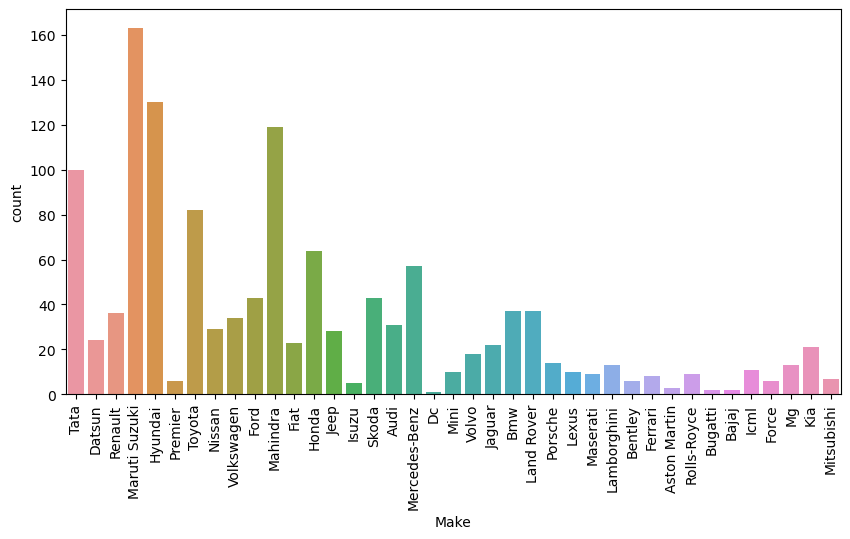

In [416]:
plt.figure(figsize=(10,5))
sns.countplot(x="Make",data=df)
plt.xticks(rotation=90);

##### Insights:
- Maruti suzuki has highest number of cars

- Hyundai has second highest number of cars

- DC has the least number of cars

### Finding Average,Minimum And Maximum Price Of All Cars

In [86]:
df["Price"].agg(['max','min','mean'])

max     2.121554e+08
min     2.364470e+05
mean    4.596538e+06
Name: Price, dtype: float64

### Insights :
- Minimum price : 2.364470e+05 (i.e 2 lakhs 36 thousands)

- Maximum Price : 2.121554e+08 (i.e 21 crores)

- Average Price : 4.596538e+06 ( i.e 45 lakhs)

### Companies whose price is greater than average price.

In [88]:
len(df[df['Price']>=df['Price'].mean()])

244

In [418]:
df[df["Price"]>np.mean(df["Price"])][["Price","Model","Make"]].sort_values(by="Price",ascending=False)

,Price,Model,Make
356,212155397.0,Chiron,Bugatti
355,192142937.0,Chiron,Bugatti
1219,95000000.0,Rolls-Royce Phantom,Rolls-Royce
880,83755383.0,Rolls-Royce Drophead Coupe,Rolls-Royce
354,77312661.0,Rolls-Royce Phantom Coupe,Rolls-Royce
1220,75400000.0,Rolls-Royce Phantom,Rolls-Royce
353,69500000.0,Rolls-Royce Cullinan,Rolls-Royce
879,59216193.0,Rolls-Royce Dawn,Rolls-Royce
350,53247201.0,Rolls-Royce Ghost Series Ii,Rolls-Royce
877,53210327.0,Aventador,Lamborghini


#### - The Most Expensive Car Is Bugatti Chiron ,followed by Rolls-Royce Phantom
#### - Datsun Is The Least Expensive Car

####  Details of Bugatti Chiron Are As Follows:-


In [420]:
df[df["Price"]==df["Price"].max()]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
356,16.0,2.0,2.0,6.0,Bugatti,Chiron,Sport,212155397.0,7993.0,RWD (Rear Wheel Drive),BS 6,"Remote, Smart Key",1600.0,1479.0,Digital,Digital,Digital,Yes,Petrol,5.95,Runflat,Runflat,165.0,350.0,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not_defined,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes


##  Saving the data of above average price in df_a 

In [421]:
df_a=df[df["Price"]>=df["Price"].mean()][["Make","Model","Variant","Price"]]
df_a

,Make,Model,Variant,Price
278,Jaguar,Xe,Se Diesel,4633000.0
279,Jaguar,Xe,Se Petrol,4633000.0
280,Jaguar,Xf,2.0 Prestige,5436329.0
281,Jaguar,Xf,2.0 Portfolio,6073446.0
282,Jaguar,Xf,2.0 Portfolio Diesel,6138811.0
283,Jaguar,Xf,2.0 Prestige Diesel,5506622.0
284,Jaguar,Xf,2.0 Pure Diesel,4977080.0
285,Audi,A3 Cabriolet,40 Tfsi,5038000.0
286,Audi,A6,Premium Plus 45 Tfsi,5442200.0
287,Audi,A6,Technology 45 Tfsi,5942200.0


#### No of companies having price greater than average price

In [422]:
df_a["Make"].nunique()

20

#### Name of companies having price greater than average price

In [423]:
df_a["Make"].value_counts().sort_values(ascending=False)

Mercedes-Benz    42
Land Rover       37
Bmw              31
Audi             21
Jaguar           20
Porsche          14
Lamborghini      13
Lexus            10
Volvo             9
Rolls-Royce       9
Maserati          9
Ferrari           8
Bentley           6
Jeep              5
Aston Martin      3
Toyota            2
Bugatti           2
Ford              1
Nissan            1
Mitsubishi        1
Name: Make, dtype: int64

- Mercedes-Benz have the highest above average price then Land Rover and Bmw.

## Checking For Outliers

<AxesSubplot: xlabel='Price'>

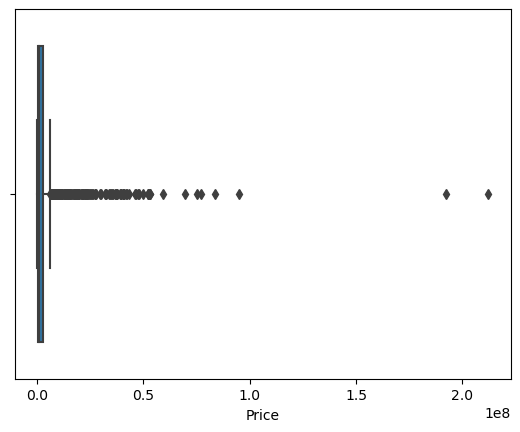

In [99]:
sns.boxplot(x='Price',data=df)

## As We Can See We Have Many Outliers In The Data

In [100]:
df[df['Price']>=150000000]
# extreme outlier

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
355,16.0,4.0,2.0,2.0,6.0,1.0,Bugatti,Chiron,W16,192142937.0,7993.0,RWD (Rear Wheel Drive),BS 6,"Remote, Smart Key",147.0,160.0,Digital,Digital,Digital,Yes,Petrol,595.0,MacPherson Strut,Torsion Beam,179.608916,387.5852,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not-defined,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
356,16.0,4.0,2.0,2.0,6.0,1.0,Bugatti,Chiron,Sport,212155397.0,7993.0,RWD (Rear Wheel Drive),BS 6,"Remote, Smart Key",160.0,147.0,Digital,Digital,Digital,Yes,Petrol,595.0,Runflat,Runflat,179.608916,387.5852,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not-defined,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes


### so we remove the outliers (bugati)


In [425]:
x= df[df['Price']<150000000]
# so now avg price is 42 lakh first is 45.

###  Correlation corresponding to price

In [426]:
df.corr()['Price']
# +ve correlated -- displacement power torque cylinder
# -ve correlated -- 

Cylinders                 0.817001
Doors                    -0.460311
Seating_Capacity         -0.307150
Number_of_Airbags         0.335710
Price                     1.000000
Displacement              0.792404
Power                     0.855190
Torque                    0.702151
ARAI_Certified_Mileage   -0.198265
Ground_Clearance         -0.042823
Boot_Space                0.043589
Name: Price, dtype: float64

### checking on x (removing outlier Bugatti (21 crore))


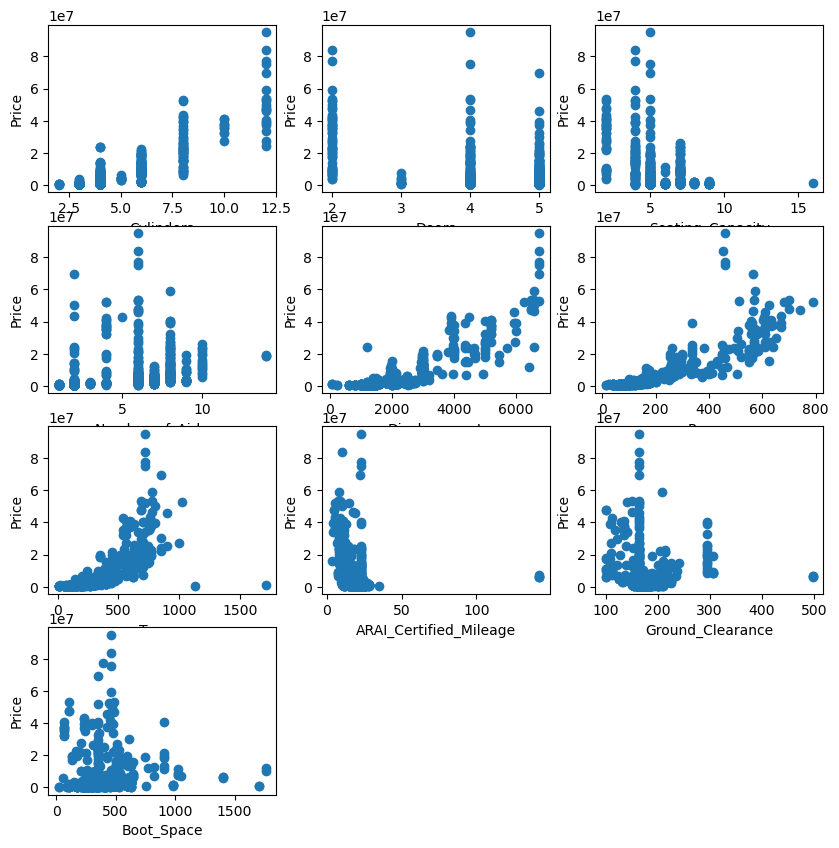

In [436]:
numeric = [int,float]
n = 1
plt.figure(figsize=(10,10))
for i in x.select_dtypes(include=numeric):
    if i!='Price':
        plt.subplot(4,3,n)
        plt.scatter(x[i],x['Price'])
        plt.xlabel(i)
        # plt.title(i)
        plt.ylabel('Price')
        n = n+1
# power, displacement, torque(till 750) sort of linear
# cylinder (no sort of linear) 
# 4-5 seating capacity cars are expensive car

#### Insight:
- Price, Cylinders, Doors, and Seating_Capacity(mostly 4-5 seats cars are costlier) don't have linear relationship
- Displacement, Power, and Torque have sort of linear relationship

### find the min, max and average price of the cars based on their company

In [424]:
df.groupby(['Make'])['Price'].agg(['min','max','mean']).sort_values(by='mean',ascending=False)
# least expensive bajaj, datsun
# bugati rolls royce ferrari

,min,max,mean
Make,,,
Bugatti,192142937.0,212155397.0,2.021492e+08
Rolls-Royce,46709733.0,95000000.0,6.779633e+07
Ferrari,35000000.0,52000000.0,4.287250e+07
Bentley,33791059.0,52571294.0,4.056585e+07
Lamborghini,30000000.0,53210327.0,3.905392e+07
Aston Martin,29500000.0,40456503.0,3.626744e+07
Maserati,13387856.0,19865675.0,1.569689e+07
Porsche,6998000.0,22613000.0,1.534600e+07
Lexus,5695000.0,23290000.0,1.501530e+07


## details of top 3 expensive company's car

In [428]:
df[((df['Make']=='Bugatti')|(df['Make']=='Ferrai')|(df['Make']=='Rolls-Royce'))]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
349,12.0,4.0,5.0,6.0,Rolls-Royce,Rolls-Royce Ghost Series Ii,6.6,46709733.0,6593.0,RWD (Rear Wheel Drive),BS IV,Smart Key,563.0,780.0,Digital,Analog,Analog,Yes,Petrol,17.30,Independent Double Wishbone with Air Springs,Independent Multi-Link with Air Springs,150.0,490.0,DVD Player with USB & Aux-in,not_defined,Fully automatic climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
350,12.0,4.0,5.0,6.0,Rolls-Royce,Rolls-Royce Ghost Series Ii,Ewb,53247201.0,6592.0,RWD (Rear Wheel Drive),BS IV,Smart Key,570.0,780.0,Digital,Analog,Analog,Yes,Petrol,7.29,Independent Double Wishbone with Air Springs,Independent Multi-Link with Air Springs,150.0,490.0,DVD Player with USB & Aux-in,not_defined,Fully automatic climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
351,12.0,2.0,4.0,2.0,Rolls-Royce,Rolls-Royce Wraith,Coupe,50025840.0,6592.0,AWD (All Wheel Drive),BS IV,Smart Key,625.0,800.0,Digital,not_defined,Yes,Yes,Petrol,10.20,Double wishbone,Multi-Link,165.0,470.0,CD Player with USB & Aux-in,not_defined,"Fully automatic climate control, 2 Zone Climat...",not_defined,not_defined,Yes,Yes,Yes,not_defined,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,not_defined,Electric Adjustment with Memory,Yes,not_defined,Yes,not_defined,not_defined,not_defined,not_defined,Yes,Yes,Yes
353,12.0,5.0,5.0,2.0,Rolls-Royce,Rolls-Royce Cullinan,Suv,69500000.0,6750.0,AWD (All Wheel Drive),BS 6,not_defined,563.0,850.0,not_defined,not_defined,not_defined,not_defined,Petrol,22.40,Double wishbone front axle,5 Link Rear Suspension with Coil Spring,165.0,350.0,CD Player with USB & Aux-in,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,Yes,not_defined,not_defined,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined
354,12.0,2.0,4.0,6.0,Rolls-Royce,Rolls-Royce Phantom Coupe,6.8 L,77312661.0,6749.0,RWD (Rear Wheel Drive),BS IV,Smart Key,460.0,720.0,Digital,Analog,Analog,Yes,Petrol,22.80,Independent Double Wishbone with Air Springs,Independent Multi-Link with Air Springs,164.0,395.0,DVD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
355,16.0,2.0,2.0,6.0,Bugatti,Chiron,W16,192142937.0,7993.0,RWD (Rear Wheel Drive),BS 6,"Remote, Smart Key",1479.0,1600.0,Digital,Digital,Digital,Yes,Petrol,5.95,MacPherson Strut,Torsion Beam,165.0,350.0,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not_defined,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
356,16.0,2.0,2.0,6.0,Bugatti,Chiron,Sport,

## now we will find out the cause i.e why these cars are expensive based on four premium features


In [429]:
grp = df.groupby(['Make'])['Cylinders','Displacement','Torque','Power']

C:\Users\md kaif\AppData\Local\Temp\ipykernel_11644\1061030777.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp = df.groupby(['Make'])['Cylinders','Displacement','Torque','Power']


In [431]:
grp.get_group('Bugatti')


,Cylinders,Displacement,Torque,Power
355,16.0,7993.0,1600.0,1479.0
356,16.0,7993.0,1479.0,1600.0


- Bugatti has 16 cylinders and highest Displacement, Power and Torque, features for high cost.

In [432]:
grp.get_group('Rolls-Royce')


,Cylinders,Displacement,Torque,Power
349,12.0,6593.0,780.0,563.0
350,12.0,6592.0,780.0,570.0
351,12.0,6592.0,800.0,625.0
353,12.0,6750.0,850.0,563.0
354,12.0,6749.0,720.0,460.0
879,12.0,6598.0,780.0,571.0
880,12.0,6749.0,720.0,453.0
1219,12.0,6749.0,720.0,460.0
1220,12.0,6749.0,720.0,460.0


- Rolls-Royce has 12 cylinders and second highest Displacement, Power and Torque.

In [437]:
grp.get_group('Ferrari')

,Cylinders,Displacement,Torque,Power
344,8.0,3855.0,755.0,560.0
348,8.0,4497.0,540.0,605.0
872,8.0,3902.0,760.0,670.0
873,8.0,3902.0,760.0,670.0
874,8.0,3900.0,760.0,610.0
875,8.0,6262.0,697.0,681.0
1058,12.0,6496.0,718.0,789.0
1172,8.0,3902.0,760.0,669.0


- Ferrari has 8 (least) number of cylinders

### buyer can choose based on the following premium factor

1. safety 
2. fuel type
3. torque
4. seatiing capacity

## Number Of Airbags In Cars

In [450]:
df.groupby(['Make'])['Number_of_Airbags'].agg(['min','max','mean']).sort_values(by='mean',ascending=False).head()

,min,max,mean
Make,,,
Lexus,8.0,14.0,10.600000
Audi,4.0,10.0,7.580645
Land Rover,2.0,10.0,7.486486
Aston Martin,6.0,8.0,7.333333
Mercedes-Benz,2.0,10.0,7.192982


- Lexus Has The Highest Number Of Airbags Followed By Audi 
- Maruti Suzuki Has The Least Number Airbags In Their Cars
- So From Safety Point Of View Lexus Is The Best Car To Choose ..

In [449]:
df.groupby(['Make'])['Torque'].agg(['min','max','mean']).sort_values(by='mean',ascending=False).head()

,min,max,mean
Make,,,
Bugatti,1479.0,1600.0,1539.500000
Bentley,660.0,1020.0,811.666667
Rolls-Royce,720.0,850.0,763.333333
Ferrari,540.0,760.0,718.750000
Aston Martin,630.0,700.0,671.666667


- Rolls-Royce Has The Highest Torque After Bugatti

### Highest Mileage

In [448]:
x.groupby(['Make'])['ARAI_Certified_Mileage'].agg(['min','max','mean']).sort_values(by='mean',ascending=False).head()

,min,max,mean
Make,,,
Bajaj,23.0,35.0,29.000000
Mercedes-Benz,7.8,142.0,23.805955
Maruti Suzuki,11.9,28.4,22.511043
Honda,14.4,27.4,21.362500
Datsun,20.1,25.1,21.341667


#### Removing Anomalies In The  Mileage Columns

In [442]:
x[(x["ARAI_Certified_Mileage"]==142.0)]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
794,6.0,4.0,5.0,7.0,Mercedes-Benz,Mercedes-Benz E-Class,E350 D,7285332.0,2987.0,RWD (Rear Wheel Drive),BS IV,Smart Key,268.0,620.0,Analog,Analog,Analog,Yes,Diesel,142.0,"McPhersons axle with coil spring Coil springs,...",Multi link independent suspensions with coil s...,155.0,540.0,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,3 Zone climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Semi Automatic Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,not_defined,Yes,Yes
795,6.0,4.0,5.0,7.0,Mercedes-Benz,Mercedes-Benz E-Class,E220D,5964321.0,2987.0,RWD (Rear Wheel Drive),BS IV,Smart Key,268.0,620.0,Analog,Analog,Analog,Yes,Diesel,142.0,"McPhersons axle with coil spring Coil springs,...",Multi link independent suspensions with coil s...,155.0,540.0,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,3 Zone climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Semi Automatic Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,not_defined,Yes,Yes
799,6.0,4.0,5.0,7.0,Mercedes-Benz,Mercedes-Benz E-Class,E220D Expression,5850000.0,2987.0,RWD (Rear Wheel Drive),BS IV,Smart Key,268.0,620.0,Analog,Analog,Analog,Yes,Diesel,142.0,"McPhersons axle with coil spring Coil springs,...",Multi link independent suspensions with coil s...,155.0,540.0,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,3 Zone climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Semi Automatic Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,not_defined,Yes,Yes
800,6.0,4.0,5.0,7.0,Mercedes-Benz,Mercedes-Benz E-Class,E220D Exclusive,6250000.0,2987.0,RWD (Rear Wheel Drive),BS IV,Smart Key,268.0,620.0,Analog,Analog,Analog,Yes,Diesel,142.0,"McPhersons axle with coil spring Coil springs,...",Multi link independent suspensions with coil s...,155.0,540.0,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,3 Zone climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Semi Automatic Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,not_defined,Yes,Yes


In [443]:
df.loc[794,"ARAI_Certified_Mileage"]=14.2
df.loc[795,"ARAI_Certified_Mileage"]=14.2
df.loc[799,"ARAI_Certified_Mileage"]=14.2
df.loc[800,"ARAI_Certified_Mileage"]=14.2

#### After Rectifying Checking Again

In [447]:
df.groupby(['Make'])['ARAI_Certified_Mileage'].agg(['min','max','mean']).sort_values(by='mean',ascending=False).head()

,min,max,mean
Make,,,
Bajaj,23.0,35.0,29.000000
Maruti Suzuki,11.9,28.4,22.511043
Honda,14.4,27.4,21.362500
Datsun,20.1,25.1,21.341667
Mg,17.4,23.0,21.276923


- Bajaj's Car Have The Highest Mileage Followed Maruti Suzuki

### Sorting Cars According To Boot-Space

In [446]:
df.groupby(['Make'])['Boot_Space'].agg(['min','max','mean']).sort_values(by='mean',ascending=False).head()

,min,max,mean
Make,,,
Bmw,281.0,1400.0,545.702703
Skoda,270.0,625.0,537.906977
Land Rover,251.0,1761.0,494.351351
Mercedes-Benz,165.0,825.0,469.122807
Maserati,173.0,580.0,467.111111


- BMW Has The Boot - Space Followed By Skoda

#### Max,min and average power Company-wise Accordingly

In [438]:
df.groupby(["Make"])["Power"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head()

,min,max,mean
Make,,,
Bugatti,1479.0,1600.0,1539.500000
Ferrari,560.0,789.0,656.750000
Lamborghini,571.0,740.0,636.461538
Bentley,507.0,616.0,563.833333
Aston Martin,505.0,608.0,557.666667


- Buggati Boasts Of The Highest Power Among The Listed Car Companies

### Seating_Capacity

In [439]:
df.groupby(["Make"])["Seating_Capacity"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head()

,min,max,mean
Make,,,
Icml,7.0,9.0,8.454545
Mitsubishi,7.0,7.0,7.000000
Mahindra,4.0,9.0,6.512605
Land Rover,4.0,7.0,6.135135
Isuzu,5.0,7.0,5.800000


- ICML is Leading The Charts In Terms Of Seating Capacity

## Taking those  features having only two unique values (yes or no) and we will treat them as extra features.

In [452]:
extra_features = ["Navigation_System","Second_Row_AC_Vents","ESP_(Electronic_Stability_Program)","Cooled_Glove_Box","Turbocharger","Rain_Sensing_Wipers","Automatic_Headlamps","Cruise_Control","Make","Price","EBA_(Electronic_Brake_Assist)","EBD_(Electronic_Brake-force_Distribution)","ABS_(Anti-lock_Braking_System)","Gear_Indicator","Auto-Dimming_Rear-View_Mirror","Hill_Assist","Key_Off_Reminder","USB_Compatibility","Model"]
extra_features

['Navigation_System',
 'Second_Row_AC_Vents',
 'ESP_(Electronic_Stability_Program)',
 'Cooled_Glove_Box',
 'Turbocharger',
 'Rain_Sensing_Wipers',
 'Automatic_Headlamps',
 'Cruise_Control',
 'Make',
 'Price',
 'EBA_(Electronic_Brake_Assist)',
 'EBD_(Electronic_Brake-force_Distribution)',
 'ABS_(Anti-lock_Braking_System)',
 'Gear_Indicator',
 'Auto-Dimming_Rear-View_Mirror',
 'Hill_Assist',
 'Key_Off_Reminder',
 'USB_Compatibility',
 'Model']

### df2 having extra features with company name and price

In [453]:
df2=df[extra_features]
df2

,Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,Cruise_Control,Make,Price,EBA_(Electronic_Brake_Assist),EBD_(Electronic_Brake-force_Distribution),ABS_(Anti-lock_Braking_System),Gear_Indicator,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Key_Off_Reminder,USB_Compatibility,Model
0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,292667.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Nano Genx
1,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,236447.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Nano Genx
2,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,296661.0,not_defined,not_defined,not_defined,not_defined,Yes,Yes,not_defined,not_defined,Nano Genx
3,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,334768.0,not_defined,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined,Nano Genx
4,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,272223.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Nano Genx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Yes,Yes,not_defined,not_defined,Yes,not_defined,not_defined,Yes,Honda,1302000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes,City
1272,Yes,Yes,not_defined,Yes,Yes,Yes,Yes,Yes,Honda,1421000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes,City
1273,Yes,Yes,not_defined,not_defined,not_defined,not_defined,Yes,Yes,Honda,1431000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes,City
1274,Yes,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,Yes,Honda,1201000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes,City


### We will compare with Model not Make , So Changing The Index To Model And Saving It To Df3

In [454]:
df3=df2.copy()
df3.set_index('Model',inplace=True)
df3

,Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,Cruise_Control,Make,Price,EBA_(Electronic_Brake_Assist),EBD_(Electronic_Brake-force_Distribution),ABS_(Anti-lock_Braking_System),Gear_Indicator,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Key_Off_Reminder,USB_Compatibility
Model,,,,,,,,,,,,,,,,,,
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,292667.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,236447.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,296661.0,not_defined,not_defined,not_defined,not_defined,Yes,Yes,not_defined,not_defined
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,334768.0,not_defined,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,272223.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City,Yes,Yes,not_defined,not_defined,Yes,not_defined,not_defined,Yes,Honda,1302000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes
City,Yes,Yes,not_defined,Yes,Yes,Yes,Yes,Yes,Honda,1421000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes
City,Yes,Yes,not_defined,not_defined,not_defined,not_defined,Yes,Yes,Honda,1431000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes


In [455]:
df3.index

Index(['Nano Genx', 'Nano Genx', 'Nano Genx', 'Nano Genx', 'Nano Genx',
       'Nano Genx', 'Redi-Go', 'Redi-Go', 'Redi-Go', 'Redi-Go',
       ...
       'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City',
       'Montero'],
      dtype='object', name='Model', length=1276)

In [456]:
df3.values

array([['not_defined', 'not_defined', 'not_defined', ..., 'not_defined',
        'not_defined', 'not_defined'],
       ['not_defined', 'not_defined', 'not_defined', ..., 'not_defined',
        'not_defined', 'not_defined'],
       ['not_defined', 'not_defined', 'not_defined', ..., 'Yes',
        'not_defined', 'not_defined'],
       ...,
       ['Yes', 'Yes', 'not_defined', ..., 'not_defined', 'Yes', 'Yes'],
       ['Yes', 'Yes', 'not_defined', ..., 'not_defined', 'Yes', 'Yes'],
       ['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes']], dtype=object)

In [457]:
for i,j in zip(df3.index,df3.values):
    print(i,"***",j)

Nano Genx *** ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 292667.0 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined']
Nano Genx *** ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 236447.0 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined']
Nano Genx *** ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 296661.0 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Yes' 'Yes' 'not_defined'
 'not_defined']
Nano Genx *** ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 334768.0 'not_defined'
 'not_defined' 'not_defined' 'Yes' 'not_defined' 'not_defined'
 'not_defined' 'no

### Counting The Number Of Features A Car Has

In [458]:
for i,j in zip(df3.index,df3.values):
    c=0
    l=[]
    for k in j:
        if type(k)==str:
            if k=="Yes":
                c=c+1
                l.append(k)
    print("Model--------",i,",--------Count------",c,",---------Price-------",j[9])

Model-------- Nano Genx ,--------Count------ 0 ,---------Price------- 292667.0
Model-------- Nano Genx ,--------Count------ 0 ,---------Price------- 236447.0
Model-------- Nano Genx ,--------Count------ 2 ,---------Price------- 296661.0
Model-------- Nano Genx ,--------Count------ 1 ,---------Price------- 334768.0
Model-------- Nano Genx ,--------Count------ 0 ,---------Price------- 272223.0
Model-------- Nano Genx ,--------Count------ 1 ,---------Price------- 314815.0
Model-------- Redi-Go ,--------Count------ 1 ,---------Price------- 279650.0
Model-------- Redi-Go ,--------Count------ 1 ,---------Price------- 351832.0
Model-------- Redi-Go ,--------Count------ 0 ,---------Price------- 333419.0
Model-------- Redi-Go ,--------Count------ 0 ,---------Price------- 362000.0
Model-------- Redi-Go ,--------Count------ 0 ,---------Price------- 390000.0
Model-------- Redi-Go ,--------Count------ 1 ,---------Price------- 437065.0
Model-------- Kwid ,--------Count------ 4 ,---------Price-------

#### Insights :
###### From above output we can see price increases with increase number of features and those models which have different price on same number of features where other factors like torque , power matters like nano genx cars' etc.


###### Not much of a relation of Price with these features as we can see, with some model price increases and with some model its decreases.

## Data Preparation for Machine Learning

In [132]:
df.head()

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,2.0,5.0,4.0,2.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,236.000000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,Manual Adjustment,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined
1,2.0,2.0,5.0,4.0,2.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not-defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,236.000000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,Manual Adjustment,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined
2,2.0,2.0,4.0,4.0,2.0,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not-defined,38.0,51.0,Digital,Analog,Not on offer,Yes,CNG,167.892162,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,Manual Adjustment,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined
3,2.0,2.0,5.0,4.0,2.0,2.0,Tata,Nano Genx,Xta,334768.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,219.000000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,94.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not-defined,not-defined,Yes,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,Manual Adjustment,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined
4,2.0,2.0,5.0,4.0,2.0,2.0,Tata,Nano Genx,Xm,272223.0,624.0,RWD (Rear Wheel Drive),BS IV,not-defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,236.000000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,Manual Adjustment,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined


In [133]:
df['Make'].nunique()

39

In [134]:
df['Model'].nunique()

263

In [135]:
df['Variant'].nunique()

1064

In [136]:
for i in df.columns:
    print(i,"-------------------------",df[i].unique())

Cylinders ------------------------- [ 2.  3.  4.  5.  6.  8. 12. 10. 16.]
Valves_Per_Cylinder ------------------------- [ 2.  4. 12. 16.  8.  1.  6.  3.]
Doors ------------------------- [5. 4. 2. 3.]
Seating_Capacity ------------------------- [ 4.  5.  7.  2.  6.  9.  8. 16.]
Number_of_Airbags ------------------------- [ 2.  1.  4.  6.  9.  8.  7. 10.  5.  3. 14.]
USB_Ports ------------------------- [2. 3. 1.]
Make ------------------------- ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi']
Model ------------------------- ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Activ

### We will use Mean Target encoding,and its drawback is Data Leakage(Overfitting) and for overfitting we will use cross validation.

- Dropping Unnecessary Columns ...

In [460]:
df.drop(columns=["Make","Tachometer","Tripmeter","Front_Suspension","Rear_Suspension","Audiosystem","Third_Row_AC_Vents","Ventilation_System","Key_Off_Reminder","Cooled_Glove_Box","Gear_Shift_Reminder","Rain_Sensing_Wipers","Seat_Height_Adjustment","Adjustable_Steering_Column","Rear_Center_Armrest"],inplace=True)

In [461]:
df.columns

Index(['Cylinders', 'Doors', 'Seating_Capacity', 'Number_of_Airbags', 'Model',
       'Variant', 'Price', 'Displacement', 'Drivetrain', 'Emission_Norm',
       'Keyless_Entry', 'Power', 'Torque', 'Odometer', 'Speedometer',
       'Fuel_Type', 'ARAI_Certified_Mileage', 'Ground_Clearance', 'Boot_Space',
       'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Gear_Indicator',
       'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Parking_Assistance',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Navigation_System', 'Second_Row_AC_Vents',
       'ESP_(Electronic_Stability_Program)', 'Turbocharger',
       'Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control'],
      dtype='object')

In [462]:
df.shape

(1276, 34)

## Encoding 

- Label Encoding For Yes Or No Values

In [463]:
l = ['Navigation_System', 'Second_Row_AC_Vents',
       'ESP_(Electronic_Stability_Program)',
       'Turbocharger','Automatic_Headlamps',
       'Cruise_Control','EBA_(Electronic_Brake_Assist)',
       'EBD_(Electronic_Brake-force_Distribution)',
       'ABS_(Anti-lock_Braking_System)','Gear_Indicator',
       'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'USB_Compatibility',"ASR_/_Traction_Control"]
for i in l:
    df[i].replace({"Yes":1,"not_defined":0},inplace=True)
df.head(3)

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Fuel_Type,ARAI_Certified_Mileage,Ground_Clearance,Boot_Space,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Parking_Assistance,USB_Compatibility,EBA_(Electronic_Brake_Assist),Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Turbocharger,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Petrol,23.6,180.0,110.0,0,0,0,0,0,not_defined,0,0,0,0,0,0,0,0,0
1,2.0,5.0,4.0,2.0,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Petrol,23.6,180.0,110.0,0,0,0,0,0,not_defined,0,0,0,0,0,0,0,0,0
2,2.0,4.0,4.0,2.0,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,CNG,23.0,180.0,110.0,1,1,0,0,0,not_defined,0,0,0,0,0,0,0,0,0


###  ENCODING of the remaining columns

In [142]:
df['Drivetrain'].unique()

array(['RWD (Rear Wheel Drive)', 'FWD (Front Wheel Drive)',
       'AWD (All Wheel Drive)', '4WD'], dtype=object)

In [464]:
df["Drivetrain"]=df["Drivetrain"].replace({"RWD (Rear Wheel Drive)":0,"FWD (Front Wheel Drive)":1,"AWD (All Wheel Drive)":2,"4WD":3})

In [465]:
df['Drivetrain'].unique()

array([0, 1, 2, 3], dtype=int64)

In [144]:
df['Emission_Norm'].unique()

array(['BS IV', 'BS 6', 'BS III', 'BS VI'], dtype=object)

In [467]:
df['Emission_Norm']=df['Emission_Norm'].replace("BS 6","BS VI")

In [468]:
df['Emission_Norm']=df['Emission_Norm'].replace({"BS III":0,"BS IV":1,"BS VI":2})

In [470]:
df['Emission_Norm'].unique()

array([1, 2, 0], dtype=int64)

In [147]:
df['Keyless_Entry'].unique()

array(['Remote', 'not-defined', 'Yes', 'Smart Key', 'Remote, Smart Key',
       'Smart Key, Remote'], dtype=object)

In [471]:
df["Keyless_Entry"]=df["Keyless_Entry"].replace("Remote, Smart Key","Smart Key, Remote")

In [473]:
df["Keyless_Entry"]=df["Keyless_Entry"].replace({'not_defined':0,'Remote':1, 'Yes':2, 'Smart Key':3,'Smart Key, Remote':4})

In [474]:
df['Keyless_Entry'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [486]:
df['Odometer'].unique()

array(['Digital', 'Analog', 'not_defined', 'Digital, Analog', 'Yes'],
      dtype=object)

In [490]:
df["Odometer"]=df["Odometer"].replace({"Digital":0,"Analog":1,"Digital, Analog":2,"not_defined":3,"Yes":4})

In [491]:
df['Odometer'].unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [489]:
df["Speedometer"].unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [483]:
df["Speedometer"]=df["Speedometer"].replace("Digital, Analog","Analog, Digital")

In [484]:
df["Speedometer"]=df["Speedometer"].replace({"not_defined":0,"Analog":1,"Digital":2,"Analog, Digital":3,"Yes":4})

In [485]:
df["Speedometer"].unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [494]:
df["Fuel_Type"]=df["Fuel_Type"].replace({"Petrol":0,"CNG":1,"Diesel":2,"CNG + Petrol":3,"Hybrid":4,"Electric":5})

In [495]:
df["Fuel_Type"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [496]:
df["Parking_Assistance"].unique()

array(['not_defined', 'Rear sensors', 'Rear sensors with camera',
       'Front and rear sensors with camera',
       'Rear sensors, Rear sensors with camera',
       'Rear sensors with camera, Rear sensors', 'Yes',
       'Front & rear sensors with 360 degree view',
       'Front sensors, Rear sensors', 'Rear sensors, Front sensors',
       'Front and rear sensors with camera, Front & rear sensors with 360 degree view'],
      dtype=object)

In [499]:
df["Parking_Assistance"]=df["Parking_Assistance"].replace({"Rear sensors, Rear sensors with camera":"Rear sensors with camera","Rear sensors with camera, Rear sensors":"Rear sensors with camera","Front sensors, Rear sensors":"Rear sensors, Front sensors","Front and rear sensors with camera, Front & rear sensors with 360 degree view":"Front & rear sensors with 360 degree view"})

In [500]:
df["Parking_Assistance"]=df["Parking_Assistance"].replace({'not_defined':0, 'Rear sensors':1, 'Rear sensors with camera':2,
                                                           'Front and rear sensors with camera':3,
                    'Yes':4, 'Front & rear sensors with 360 degree view':5,'Rear sensors, Front sensors':6})

In [501]:
for i in df.columns:
    print(i,"-------------------------",df[i].unique())

Cylinders ------------------------- [ 2.  3.  4.  5.  6.  8. 12. 10. 16.]
Doors ------------------------- [5. 4. 2. 3.]
Seating_Capacity ------------------------- [ 4.  5.  7.  2.  6.  9.  8. 16.]
Number_of_Airbags ------------------------- [ 2.  1.  4.  6.  9.  8.  7. 10.  5.  3. 14.]
Model ------------------------- ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper Works' 'Xe' 'Xf' 'A3 Cabriolet' 'A6' 'X3'
 'Discovery Sport' 'S90' 'S5' 'X5' 'Mustang' 'Grand Cherokee'
 'Mercedes-Benz E-Cl

#### Almost All Of Our Columns Have Been Converted To Numeric Type Except Model And Variant

In [502]:
df.shape

(1276, 34)

### For Model Column We Are Doing Mean Target Encoding

In [503]:
df2=df.groupby(['Model'])["Price"].agg(["mean"]).reset_index()

In [505]:
df2.head()

,Model,mean
0,3-Series,4.540000e+06
1,458 Speciale,4.253150e+07
2,458 Spider,4.336750e+07
3,488 Gtb,3.804048e+07
4,5-Series,6.196667e+06


### Model

In [506]:
l=[]
for i in df["Model"]:
    for j, k in df2.iterrows():
        if i==k["Model"]:
            l.append(k["mean"])

In [508]:
df["Model"]=l
df.head()

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Fuel_Type,ARAI_Certified_Mileage,Ground_Clearance,Boot_Space,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Parking_Assistance,USB_Compatibility,EBA_(Electronic_Brake_Assist),Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Turbocharger,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,291263.5,Xt,292667.0,624.0,0,1,1,38.0,51.0,0,1,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,5.0,4.0,2.0,291263.5,Xe,236447.0,624.0,0,1,0,38.0,51.0,0,1,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,4.0,4.0,2.0,291263.5,Emax Xm,296661.0,624.0,0,1,0,38.0,51.0,0,1,1,23.0,180.0,110.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,5.0,4.0,2.0,291263.5,Xta,334768.0,624.0,0,1,1,38.0,51.0,0,1,0,21.9,180.0,94.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,5.0,4.0,2.0,291263.5,Xm,272223.0,624.0,0,1,0,38.0,51.0,0,1,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###  We Are Doing Mean Target Encoding For Variant Columns Also..

In [509]:
df2=df.groupby(["Variant"])["Price"].agg(["mean"]).reset_index()

In [511]:
df2.head()

,Variant,mean
0,1.0 S,390000.0
1,1.0 S Amt,437065.0
2,1.0 Turbo Gdi Dct S,940000.0
3,1.0 Turbo Gdi Dct Sx Plus,1115500.0
4,1.0 Turbo Gdi Mt S,826000.0


In [512]:
l=[]
for i in df["Variant"]:
    for j, k in df2.iterrows():
        if i==k["Variant"]:
            l.append(k["mean"])

In [513]:
df["Variant"]=l
df.head()

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Fuel_Type,ARAI_Certified_Mileage,Ground_Clearance,Boot_Space,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Parking_Assistance,USB_Compatibility,EBA_(Electronic_Brake_Assist),Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Turbocharger,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,291263.5,292667.0,292667.0,624.0,0,1,1,38.0,51.0,0,1,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,5.0,4.0,2.0,291263.5,465723.5,236447.0,624.0,0,1,0,38.0,51.0,0,1,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,4.0,4.0,2.0,291263.5,296661.0,296661.0,624.0,0,1,0,38.0,51.0,0,1,1,23.0,180.0,110.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,5.0,4.0,2.0,291263.5,334768.0,334768.0,624.0,0,1,1,38.0,51.0,0,1,0,21.9,180.0,94.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,5.0,4.0,2.0,291263.5,813741.0,272223.0,624.0,0,1,0,38.0,51.0,0,1,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [514]:
df.dtypes

Cylinders                                    float64
Doors                                        float64
Seating_Capacity                             float64
Number_of_Airbags                            float64
Model                                        float64
Variant                                      float64
Price                                        float64
Displacement                                 float64
Drivetrain                                     int64
Emission_Norm                                  int64
Keyless_Entry                                  int64
Power                                        float64
Torque                                       float64
Odometer                                       int64
Speedometer                                    int64
Fuel_Type                                      int64
ARAI_Certified_Mileage                       float64
Ground_Clearance                             float64
Boot_Space                                   f

## Checking shape of data


In [515]:
df.shape

(1276, 34)

## Step 5 : Data Modelling and Evaluation

####  Seggregate x and y

In [516]:
x=df.drop(columns=["Price"])
y=df["Price"]

####  Scaling(Standard Scaler), required for linear and KNN.

In [517]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

##### As We Applied Mean Target,  there are chances of overfitting so we use cross validation

In [518]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

####  We will compare different Supervised learning models and compare the results based on r square metric and choose the one which is more efficient .

In [519]:
lr,knn=LinearRegression(),KNeighborsRegressor()

In [520]:
r2score=[]
Models=[lr,knn]
for i in Models:
    cv=KFold(n_splits=5,random_state=1,shuffle=True)
    scores=cross_val_score(i,x_scaled,y,scoring='r2',cv=cv,n_jobs=-1)
    r2=np.mean(scores)
    r2score.append(r2)
r2score

[0.9831287136406324, 0.8575165274064313]

In [521]:
dtc=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
xgb=XGBRegressor()
adb=AdaBoostRegressor()

In [522]:
Model=[dtc,rfr,gbr,xgb,adb]

In [523]:
for i in Model:
    cv=KFold(n_splits=5,random_state=1,shuffle=True)
    scores=cross_val_score(i,x,y,scoring='r2',cv=cv,n_jobs=-1)
    r=np.mean(scores)
    r2score.append(r)

In [526]:
print((r2score),"Model=[dtc,rfr,gbr,xgb,adb]")

[0.9831287136406324, 0.8575165274064313, 0.9743836715927874, 0.9592432057700462, 0.9762780236126855, 0.9822141691778432, 0.9357682318324949] Model=[dtc,rfr,gbr,xgb,adb]


In [527]:
Model_names=["LinearRegression","KNN","DecisionTree","Randomforest","gradientboost","xgboost","adaboost"]

#### Making a DataFrame of Models and r2 score and saving it in df_final.

In [528]:
df_final=pd.DataFrame({'Regressor Models': Model_names, 'r square': r2score})
df_final

,Regressor Models,r square
0,LinearRegression,0.983129
1,KNN,0.857517
2,DecisionTree,0.974384
3,Randomforest,0.959243
4,gradientboost,0.976278
5,xgboost,0.982214
6,adaboost,0.935768


#### Viewing Graphically 

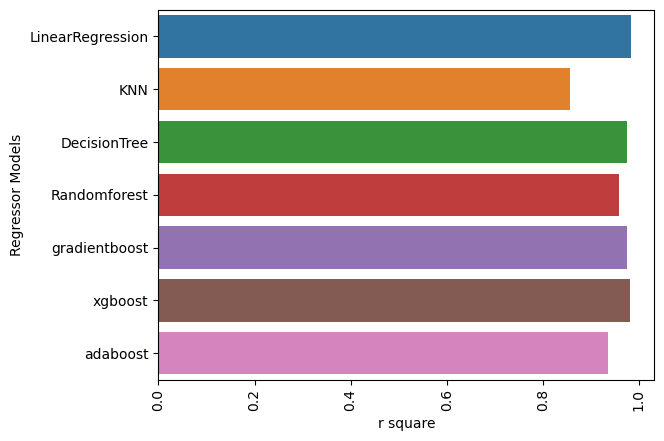

In [530]:
sns.barplot(x="r square",y="Regressor Models",orient="h",data=df_final)
plt.xticks(rotation=90);

## Step 6. Conclusion

### In this notebook, I have done cleaning , feature engineering ,extracted hidden insights and viewed the data trends with respect to price from business and buyers point of view also.


### I used selectkbest and multicoolinearity as feature selection technique and prepared the data for modelling and then applied 7 different Regressor models on data and evaluated them based on r square method .

### Linear Regression Perfomed Best On This Dataset